
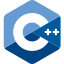
<br>

<div style="text-align:center; font-size:200%;">
 <b>Structs und Klassen</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 07 Structs und Klassen.ipynb -->
<!-- slides/module_150_classes/topic_150_structs_and_classes.cpp -->


## Sichtbarkeit von Membern

- Member von `struct` und `class` können `public`, `protected` oder `private`
  sein.
- `public`-Member sind von außen sichtbar.
- `private`-Member sind nur von Member-Funktionen der Klasse sichtbar.
- `protected`-Member sind nur von Member-Funktionen der Klasse und von
  abgeleiteten Klassen sichtbar.
- Sichtbarkeit ist eine Eigenschaft der Klasse, nicht des Objekts.

In [ ]:
#include <iostream>

struct MyStruct {
public:
    void print() {
        std::cout << public_var << ", " << private_var << "\n";
    }

    int public_var{1};
private:
    int private_var{2};
}

In [ ]:
MyStruct my_struct{};

In [ ]:
my_struct.print();

In [ ]:
my_struct.public_var

In [ ]:
my_struct.public_var = 3;

In [ ]:
// my_struct.private_var


## Invarianten

- Invarianten sind Eigenschaften eines Objekts, die immer wahr sind.
- Typischerweise wollen wir den Zustand eines Objekts von der Außenwelt
  "verstecken", um sicherzustellen, dass seine Invarianten immer wahr sind.
- Getter und Setter-Methoden sind eine Möglichkeit dies zu erreichen.

In [ ]:
struct MyStruct {
public:
    int get_state() { return state; }
    void set_state(int new_state)
    {
         state = new_state;
         if (state < 0) state = 0;
    }

private:
    int state{1};
}

In [ ]:
MyStruct my_struct{};

In [ ]:
my_struct.get_state()

In [ ]:
my_struct.set_state(3);

In [ ]:
my_struct.get_state()

In [ ]:
my_struct.set_state(-1);

In [ ]:
my_struct.get_state()


## `struct` vs. `class`

- `struct` und `class` sind in C++ sehr ähnlich.
- `struct` ist eine Klasse, bei der alle Member standardmäßig `public` sind.
- `class` ist eine Klasse, bei der alle Member standardmäßig `private` sind.
- Oft verwendet man `struct` für einfache Datenstrukturen und `class` für
  Klassen mit Methoden.

In [ ]:
struct MyStruct {
    int default_var{0};
public:
    int public_var{1};
private:
    int private_var{2};
public:
    void print() {
        std::cout << default_var << " " << public_var << " " << private_var << "\n";
    }
};

In [ ]:
class MyClass {
    int default_var{0};
public:
    int public_var{1};
private:
    int private_var{2};
public:
    void print() {
        std::cout << default_var << " " << public_var << " " << private_var << "\n";
    }
};

In [ ]:
MyStruct my_struct{};

In [ ]:
my_struct.print();

In [ ]:
my_struct.default_var

In [ ]:
my_struct.public_var

In [ ]:
// my_struct.private_var

In [ ]:
MyClass my_class{};

In [ ]:
my_class.print();

In [ ]:
// my_class.default_var

In [ ]:
my_class.public_var

In [ ]:
// my_class.private_var


## Mini-Workshop: Garantieren von Invarianten

Die Struct `MyComplex` soll folgende Invariante haben:
- `abs` ist immer der Abstand vom Punkt `(0, 0)`

Wie können Sie diese Invariante sicherstellen?

- Sie können das Interface der Struct anpassen um das zu ermöglichen.
- Möglicherweise empfiehlt es sich dabei, `MyComplex` in eine Klasse
  umzuwandeln.
- Benutzer der Struct/Klasse sollten `update_abs` nicht selbst aufrufen müssen.

In [ ]:
#include <cmath>

In [ ]:
class MyComplex {
public:
    void set_re(double new_re) {
        re = new_re;
        update_abs();
    }

    void set_im(double new_im) {
        im = new_im;
        update_abs();
    }

    double get_re() const {
        return re;
    }

    double get_im() const {
        return im;
    }

    double get_abs() const {
        return abs;
    }
private:
    double re{};
    double im{};
    double abs{};

    void update_abs() {
        abs = std::sqrt(re * re + im * im);
    }
};

In [ ]:
MyComplex c;

In [ ]:
c.set_re(3);

In [ ]:
c.set_im(4);

In [ ]:
c.get_re()

In [ ]:
c.get_im()

In [ ]:
c.get_abs()